In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date


patents = pd.read_excel('result_mod_30June2024.xlsx')
papers = pd.read_excel('Papers_Arxiv.xlsx')

In [3]:
import matplotlib.font_manager as fm

current_directory = os.getcwd()
font_path = os.path.join(current_directory, 'NanumBarunGothic.ttf')

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False

In [108]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5936\1563726608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_patents['application_date'] = pd.to_datetime(filtered_data_patents['application_date'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5936\1563726608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_patents['application_year'] = filtered_data_patents['application_date'].dt.year
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5936\

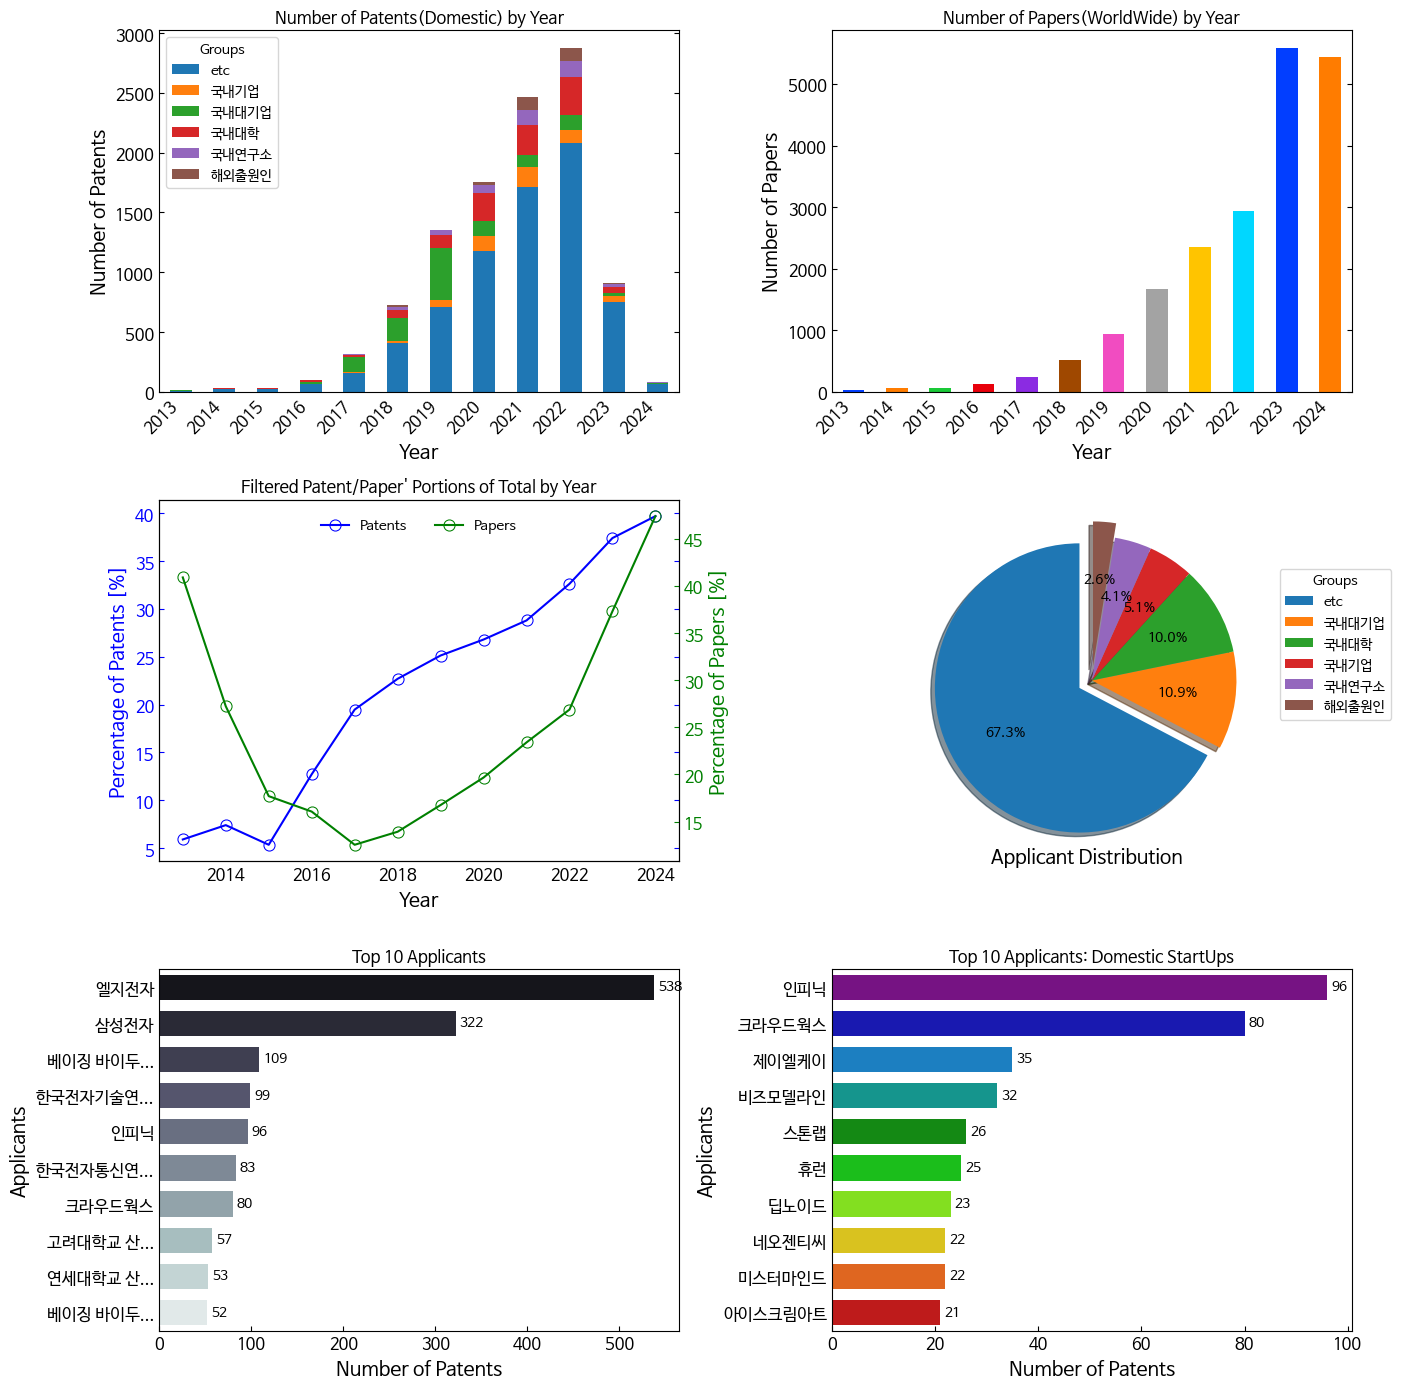

In [36]:
search_keyword='인공지능'
translated_keyword='AI'
filtered_data_patents = patents[(patents['title'].str.contains(search_keyword, na=False)) | 
                                (patents['summary'].str.contains(search_keyword, na=False))]

filtered_data_papers = papers[(papers['title'].str.contains(translated_keyword, na=False)) | 
                                (papers['Abstract'].str.contains(translated_keyword, na=False))]


filtered_data_patents['application_date'] = pd.to_datetime(filtered_data_patents['application_date'], errors='coerce')
filtered_data_patents['application_year'] = filtered_data_patents['application_date'].dt.year
filtered_counts = filtered_data_patents.groupby(['application_year', 'applicant_lgrp']).size().unstack(fill_value=0)

### to be added
import matplotlib.gridspec as gridspec
import seaborn as sns
import re

filtered_data_papers['submit_date'] = pd.to_datetime(filtered_data_papers['submit_date'], errors='coerce')
filtered_data_papers['submit_year'] = filtered_data_papers['submit_date'].dt.year
filtered_p_counts = filtered_data_papers.groupby(['submit_year']).size()


# Group the original data by year
patents['application_date'] = pd.to_datetime(patents['application_date'], errors='coerce')
patents['application_year'] = patents['application_date'].dt.year
total_patent_counts = patents.groupby('application_year').size()

papers['submit_date'] = pd.to_datetime(papers['submit_date'], errors='coerce')
papers['submit_year'] = papers['submit_date'].dt.year
total_paper_counts = papers.groupby('submit_year').size()

# Create a common index
common_index = total_patent_counts.index.union(total_paper_counts.index).union(filtered_data_patents['application_year'].dropna().unique()).union(filtered_data_papers['submit_year'].dropna().unique())

# Reindex to ensure all indices match
total_patent_counts = total_patent_counts.reindex(common_index, fill_value=0)
total_paper_counts = total_paper_counts.reindex(common_index, fill_value=0)
filtered_patent_counts = filtered_data_patents.groupby('application_year').size().reindex(common_index, fill_value=0)
filtered_paper_counts = filtered_data_papers.groupby('submit_year').size().reindex(common_index, fill_value=0)

# Calculate the percentage
filtered_patent_percentage = (filtered_patent_counts / total_patent_counts * 100).fillna(0)
filtered_paper_percentage = (filtered_paper_counts / total_paper_counts * 100).fillna(0)


applicant_group_counts = filtered_data_patents['applicant_lgrp'].value_counts()

top10_total = filtered_data_patents['applicant'].value_counts().head(10).reset_index()
top10_total.columns = ['Applicant', 'Patent Count']

filtered_df_etc_domestic = filtered_data_patents[filtered_data_patents['applicant_lgrp'].isin(['etc', '국내기업'])]
top10_etc_domestic = filtered_df_etc_domestic['applicant'].value_counts().head(10).reset_index()
top10_etc_domestic.columns = ['Applicant', 'Patent Count']


fig = plt.figure(figsize=(14, 14))
# 2X3 Plot
gs = gridspec.GridSpec(9, 6); ax1 = fig.add_subplot(gs[:3, :3]); ax2 = fig.add_subplot(gs[:3, 3:])
ax3 = fig.add_subplot(gs[3:6, :3]); ax4 = fig.add_subplot(gs[3:6, 3:])
ax5 = fig.add_subplot(gs[6:,:3]); ax6 = fig.add_subplot(gs[6:, 3:])

filtered_counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Number of Patents(Domestic) by Year')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Patents', fontsize=14)
ax1.set_xticks(range(len(filtered_counts.index)))
ax1.set_xticklabels(filtered_counts.index, rotation=45, ha='right', fontsize=12)
ax1.legend(title="Groups")
ax1.tick_params(axis='y', labelsize=12, direction='in', left=True, right=True)
ax1.tick_params(axis='x', labelsize=12, direction='in', bottom=False, top=False)

filtered_p_counts.plot(kind='bar', color=sns.color_palette("bright"), ax=ax2)           # pastel, deep, mated, bright, dark,colorblind
ax2.set_title('Number of Papers(WorldWide) by Year')
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Number of Papers', fontsize=14)
ax2.set_xticks(range(len(filtered_p_counts.index)))
ax2.set_xticklabels(filtered_p_counts.index, rotation=45, ha='right', fontsize=12)
ax2.tick_params(axis='y', labelsize=12, direction='in', left=True, right=True)
ax2.tick_params(axis='x', labelsize=12, direction='in', bottom=False, top=False)

# Line plot for percentages
ax3_twin = ax3.twinx()
sns.lineplot(x=filtered_patent_percentage.index, y=filtered_patent_percentage, ax=ax3, color='blue', label='Patents', legend=False, marker='o', markersize=8, markerfacecolor='none', markeredgecolor='blue')
sns.lineplot(x=filtered_paper_percentage.index, y=filtered_paper_percentage, ax=ax3_twin, color='green', label='Papers', legend=False, marker='o', markersize=8, markerfacecolor='none', markeredgecolor='green')

ax3.set_title("Filtered Patent/Paper' Portions of Total by Year")
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('Percentage of Patents [%]', fontsize=14, color='blue')
ax3_twin.set_ylabel('Percentage of Papers [%]', fontsize=14, color='green')
ax3.tick_params(axis='x', labelsize=12, direction='in', bottom=False, top=False)
ax3.tick_params(axis='y', labelsize=12, direction='in', left=True, right=True, colors='blue')
ax3_twin.tick_params(axis='y', labelsize=12, direction='in', left=False, right=True, colors='green')

# Combine legends for ax3 and ax3_twin
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=2, frameon=False)


explode = (0.1, 0, 0, 0, 0, 0.1)  
wedges, texts, autotexts = ax4.pie(applicant_group_counts, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.legend(wedges, applicant_group_counts.index, title="Groups", loc="center left", bbox_to_anchor=(1, 0.5, 0.1, 0.2), prop={'weight': 'bold'})
ax4.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax4.set_title('Applicant Distribution')
fig.text(0.78, 0.38, 'Applicant Distribution', ha='center', fontsize=14)

bars5=sns.barplot(x='Patent Count',y='Applicant',data=top10_total,hue='Applicant', legend=False, orient='h', errorbar=None, width=0.7, palette='bone', ax=ax5) 
ax5.set_title('Top 10 Applicants')
ax5.set_xlabel('Number of Patents', fontsize=14)
ax5.set_ylabel('Applicants', fontsize=14)
ax5.tick_params(axis='y', labelsize=12, direction='in', left=False, right=False)
ax5.tick_params(axis='x', labelsize=12, direction='in', bottom=True, top=False)
for container in bars5.containers:
    ax5.bar_label(container, padding=3)


bars6=sns.barplot(x='Patent Count',y='Applicant',data=top10_etc_domestic,hue='Applicant', legend=False, orient='h', errorbar=None, width=0.7,palette='nipy_spectral', ax=ax6) 
ax6.set_title('Top 10 Applicants: Domestic StartUps')
ax6.set_xlabel('Number of Patents', fontsize=14)
ax6.set_ylabel('Applicants', fontsize=14)
ax6.tick_params(axis='y', labelsize=12, direction='in', left=False, right=False)
ax6.tick_params(axis='x', labelsize=12, direction='in', bottom=True, top=False)
for container in bars6.containers:
    ax6.bar_label(container, padding=3)



# y축 레이블 글자수 제한 및 "(주)", "주식회사" 제거
def shorten_labels(labels, max_length=7):
    shortened = []
    for label in labels:
        text = label.get_text().strip()
        text = re.sub(r'\s*주식회사\s*|\s*\(주\)\s*', '', text)
        if len(text) > max_length:
            text = text[:max_length] + '...'
        shortened.append(text)
    return shortened

ax5.set_yticks(ax5.get_yticks())  # Add this line to set the ticks explicitly
ax5.set_yticklabels(shorten_labels(ax5.get_yticklabels()))
ax6.set_yticks(ax6.get_yticks())
ax6.set_yticklabels(shorten_labels(ax6.get_yticklabels()))

plt.tight_layout()
plt.show()



In [4]:
import requests
def translate_text(text):
    url = "https://naveropenapi.apigw.ntruss.com/nmt/v1/translation"
    headers = {"X-NCP-APIGW-API-KEY-ID": "3r1tnk1ohr", "X-NCP-APIGW-API-KEY": "twwiSo88HbmrNatHLlWYn618dWpK5P9XcD6B6Hkr"}
    data = {"source": "ko","target": "en","text": text}
    response = requests.post(url, headers=headers, data=data)
    if response.status_code == 200:
        result = response.json()
        return result['message']['result']['translatedText']
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

translated_text = translate_text("인공 지능")
print(translated_text)

Artificial intelligence


In [46]:
import requests
def translate_text(text, source_lang, target_lang, client_id, client_secret):
    url = "https://naveropenapi.apigw.ntruss.com/nmt/v1/translation"
    headers = {
        "X-NCP-APIGW-API-KEY-ID": client_id,
        "X-NCP-APIGW-API-KEY": client_secret
    }
    data = {
        "source": source_lang,
        "target": target_lang,
        "text": text
    }

    response = requests.post(url, headers=headers, data=data)
    if response.status_code == 200:
        result = response.json()
        return result['message']['result']['translatedText']
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# 사용 예제
client_id = "3r1tnk1ohr"
client_secret = "twwiSo88HbmrNatHLlWYn618dWpK5P9XcD6B6Hkr"
translated_text = translate_text("인공 지능", "ko", "en", client_id, client_secret)
print(translated_text)

Artificial intelligence


In [3]:
import deepl
def translate_keyword(keyword):
    auth_key = "c6d7b043-1235-44d4-96bd-331cc0ec8c35:fx"
    translator = deepl.Translator(auth_key)
    keyword = keyword.replace(' ', '')
    result = translator.translate_text(keyword, target_lang='EN-US')
    return result.text

translated_keyword = translate_keyword("인공지능")
print(translated_keyword)

Artificial intelligence


In [ ]:
## pip install deepl
### 50만자 / month 무료
import deepl

auth_key = "36cebcf7-0543-dcc6-d27e-블라블라"
translator = deepl.Translator(auth_key)

message = '안녕하세요. 맛있는 점심 드세요~'
result = translator.translate_text(message, target_lang="EN-US")

print(result.text)

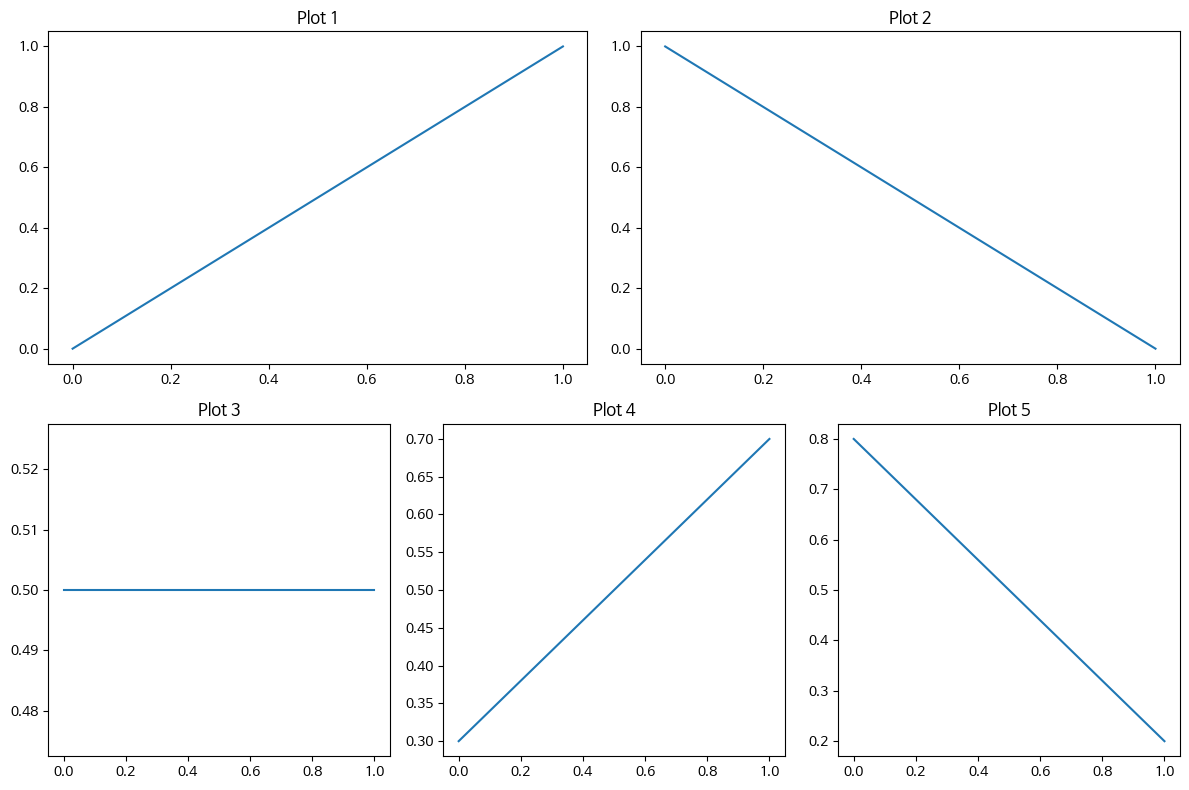

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 전체 subplot 그리드 크기 설정
fig = plt.figure(figsize=(12, 8))
# width_ratios 설정으로 각 열의 너비 비율을 조정
gs = gridspec.GridSpec(2, 6)

# 위쪽 줄에 그림 2개 (각각 3개의 grid를 차지)
ax1 = fig.add_subplot(gs[0, :3])  # 첫 번째 그림: 첫 번째 row의 첫 번째부터 세 번째 grid
ax2 = fig.add_subplot(gs[0, 3:])  # 두 번째 그림: 첫 번째 row의 네 번째부터 여섯 번째 grid

# 아래쪽 줄에 그림 3개 (각각 2개의 grid를 차지)
ax3 = fig.add_subplot(gs[1, :2])  # 세 번째 그림: 두 번째 row의 첫 번째와 두 번째 grid
ax4 = fig.add_subplot(gs[1, 2:4]) # 네 번째 그림: 두 번째 row의 세 번째와 네 번째 grid
ax5 = fig.add_subplot(gs[1, 4:])  # 다섯 번째 그림: 두 번째 row의 다섯 번째와 여섯 번째 grid

# 각 subplot에 그림 그리기
ax1.plot([0, 1], [0, 1])
ax1.set_title('Plot 1')

ax2.plot([0, 1], [1, 0])
ax2.set_title('Plot 2')

ax3.plot([0, 1], [0.5, 0.5])
ax3.set_title('Plot 3')

ax4.plot([0, 1], [0.3, 0.7])
ax4.set_title('Plot 4')

ax5.plot([0, 1], [0.8, 0.2])
ax5.set_title('Plot 5')

plt.tight_layout()
plt.show()
